# Nearest Neighbor Algorithm
## In this notebook we are going to implement the first classification Algorithm K-NN

<h1 style="color:red;font-size:60px;">Dataset</h1>
<p style="color:green;font-size:20px;">
MNIST is a classic dataset in machine learning, consisting of 28x28 gray-scale images handwritten digits. The original training set contains 60,000 examples and the test set contains 10,000 examples. In this notebook we will be working with a subset of this data: a training set of 7,500 examples and a test set of 1,000 examples.
</p>

In [4]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import time



## Spilting the dataset
Why we need to spill the dataset? 
So if the dataset is only consists of one dataset which is the train data, that makes the testing of the model that we built is depending on the data that it learnt from, so this will cause high accuracy but unreal as this train set is the set that it has already learnt from, so we spill the data into train and test datasets and in some times we will spill the data into train, test and validation datasets 

In [5]:
# Load the training set
train_data = np.load('MNIST/train_data.npy')
train_labels = np.load('MNIST/train_labels.npy')

## Load the testing set
test_data = np.load('MNIST/test_data.npy')
test_labels = np.load('MNIST/test_labels.npy')

<p style="font-family: 'Times New Roman', Times, serif;color:blue;font-size:25px;">
In the following section: we will learn about datasets, their shapes (Dimensions) and the number of pixel of each image, then showing some images.
    </p>

In [9]:
#To know the shape of a dataset we use "shape"
print("Train_data shape is: ",train_data.shape)
print("Test_data shape is: ",test_data.shape)
print("Each image shape is: ",train_data[0].shape)
#The shape of an image will be 784 which is the result of 28*28, as the image is a 28x28 image

Train_data shape is:  (7500, 784)
Test_data shape is:  (1000, 784)
Each image shape is:  (784,)


label is :  9


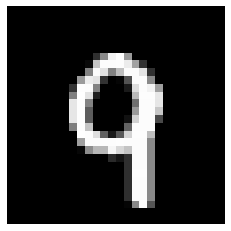

label is :  2


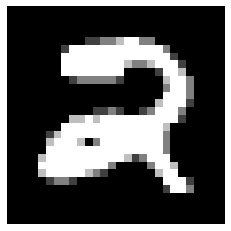

label is :  8


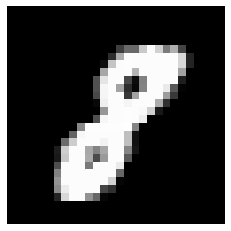

label is :  3


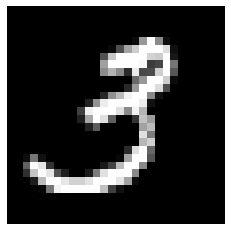

label is :  7


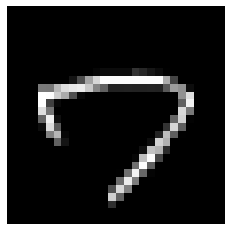

label is :  1


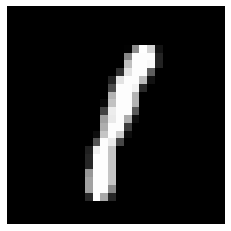

label is :  6


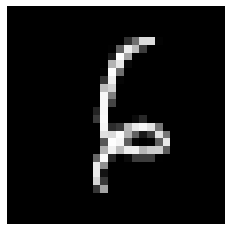

label is :  7


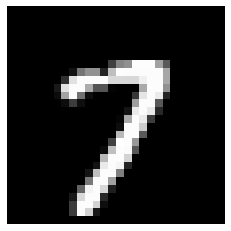

label is :  9


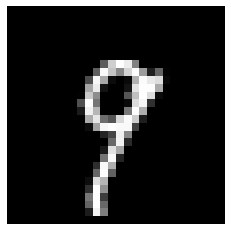

label is :  2


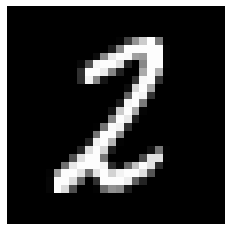

In [13]:
#To visualize some of the dataset:
#I'm going to visualize the first 10 images in the train dataset and their label
for i in range(10):
    plt.axis('off')
    plt.imshow(train_data[i].reshape((28,28)), cmap=plt.cm.gray)
    print("label is : ",train_labels[i])
    plt.show()

## 3. Squared Euclidean distance

To compute nearest neighbors in our data set, we need to first be able to compute distances between data points. A natural distance function is (Euclidean distance) : for two vectors $x, y \in \mathbb{R}^d$, their Euclidean distance is defined as 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
Often we omit the square root, and simply compute _squared Euclidean distance_:
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$
For the purposes of nearest neighbor computations, the two are equivalent: for three vectors $x, y, z \in \mathbb{R}^d$, we have $\|x - y\| \leq \|x - z\|$ if and only if $\|x - y\|^2 \leq \|x - z\|^2$.

Now we just need to be able to compute squared Euclidean distance. The following function does so.

In [14]:
def Euclidean_distance(x,y):
    return np.sum(np.power(x-y,2))

In [18]:
def find_nearest_neighbor(x):
    # Compute distances from x to every row in train_data
    distances = [Euclidean_distance(x,train_data[i,]) for i in range(len(train_labels))]
    # Get the index of the smallest distance using the argmin function
    #argmin and argmax funcions are functions that returns the index of the min or max elements in the list
    return np.argmin(distances)

In [19]:
#Then to know the image belongs to which class 
def NN_classifier(x):
    return train_labels[find_nearest_neighbor(x)]

# Testing the model using the test dataset

Correct label is :  0
Predicted label is:  0


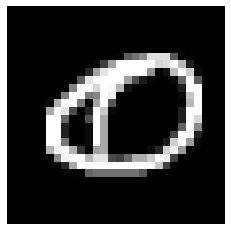

Correct label is :  2
Predicted label is:  2


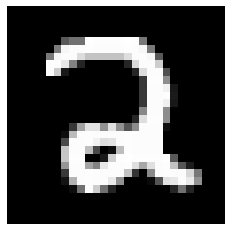

Correct label is :  6
Predicted label is:  6


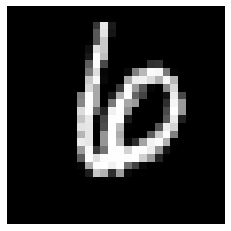

Correct label is :  5
Predicted label is:  5


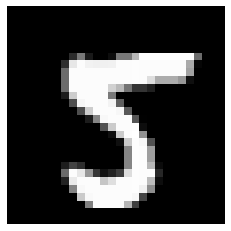

Correct label is :  9
Predicted label is:  9


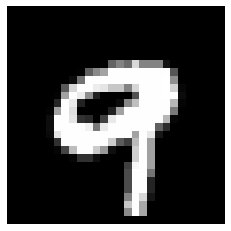

Correct label is :  6
Predicted label is:  6


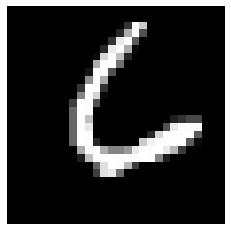

Correct label is :  0
Predicted label is:  0


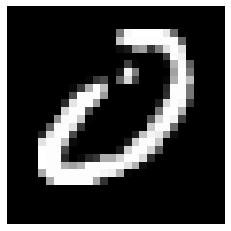

Correct label is :  7
Predicted label is:  7


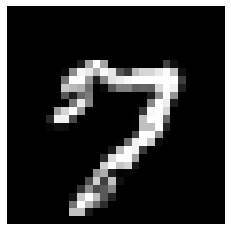

Correct label is :  1
Predicted label is:  1


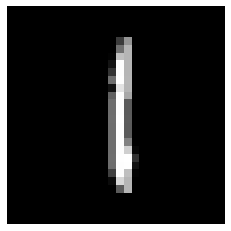

Correct label is :  1
Predicted label is:  1


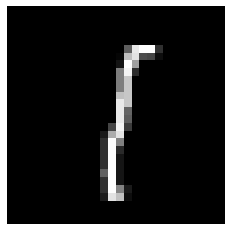

Correct label is :  4
Predicted label is:  4


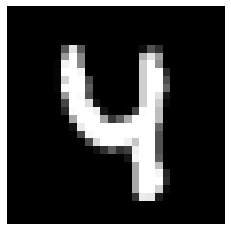

Correct label is :  6
Predicted label is:  6


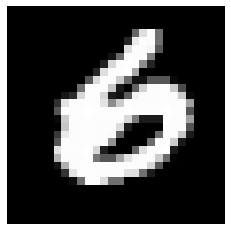

Correct label is :  7
Predicted label is:  7


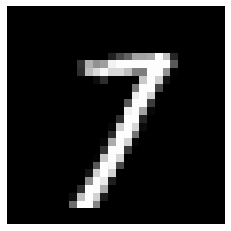

Correct label is :  7
Predicted label is:  7


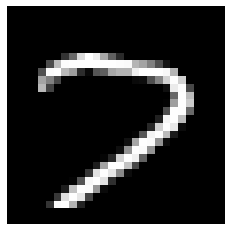

Correct label is :  5
Predicted label is:  5


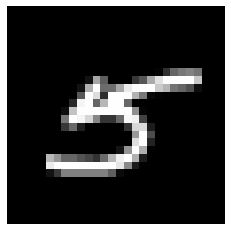

Correct label is :  7
Predicted label is:  7


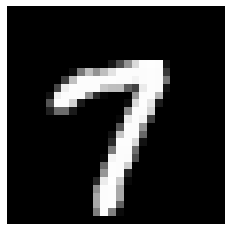

Correct label is :  7
Predicted label is:  7


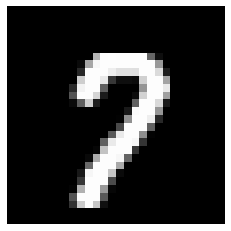

Correct label is :  7
Predicted label is:  7


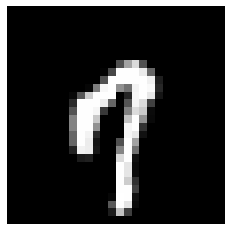

Correct label is :  0
Predicted label is:  0


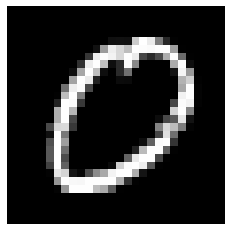

Correct label is :  0
Predicted label is:  0


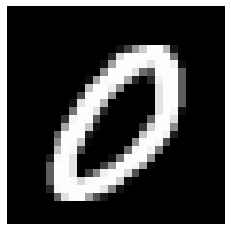

In [21]:
#Here we will predict for the first 20 images in the test set
for i in range(20):
    plt.axis('off')
    plt.imshow(test_data[i].reshape((28,28)), cmap=plt.cm.gray)
    print("Correct label is : ",test_labels[i])
    print("Predicted label is: ",NN_classifier(test_data[i]))
    plt.show()

In [23]:
#Now, we want to calculate the accuracy of the model:
#append the test dataset into the calssifier 
y_hat = [NN_classifier(test_data[i,]) for i in range(len(test_labels))]
#How to know the error ?
#the simpliest way is to know how many times our model fails to predict the label correctly / total casses
err_positions = np.not_equal(y_hat, test_labels)
error = float(np.sum(err_positions))/len(test_labels)
print("Error of the model = ",error)

Error of the model =  0.046


## In the following cells, test the algorithm with some handmade pics

In [26]:
from matplotlib import image
from PIL import Image
from numpy import asarray

Correct label is : 1
Predicted label is:  1


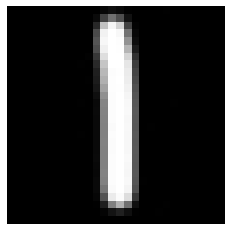

In [95]:
image = Image.open('1.jpg')
data = asarray(image)
x=data[:,:,0].reshape(784)
print("Correct label is : 1")
print("Predicted label is: ",NN_classifier(x))
from matplotlib import image
img = image.imread('1.jpg')
plt.axis('off')
plt.imshow(img)
plt.show()

Correct label is : 0
Predicted label is:  0


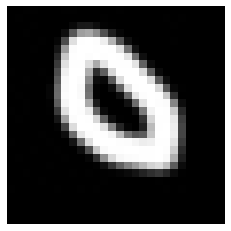

In [94]:
image = Image.open('0.jpg')
data = asarray(image)
x=data[:,:,0].reshape(784)
print("Correct label is : 0")
print("Predicted label is: ",NN_classifier(x))
from matplotlib import image
img = image.imread('0.jpg')
plt.axis('off')
plt.imshow(img)
plt.show()

Correct label is : 4
Predicted label is:  4


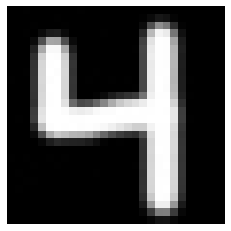

In [93]:
image = Image.open('4.jpg')
data = asarray(image)

x=data[:,:,0].reshape(784)
print("Correct label is : 4")
print("Predicted label is: ",NN_classifier(x))
from matplotlib import image
plt.axis('off')
img = image.imread('4.jpg')
plt.imshow(img)
plt.show()

Correct label is : 5
Predicted label is:  5


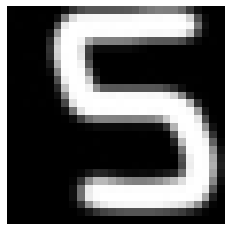

In [143]:
image = Image.open('5.jpg')
data = asarray(image)

x=data[:,:,0].reshape(784)
print("Correct label is : 5")
print("Predicted label is: ",NN_classifier(x))
from matplotlib import image
img = image.imread('5.jpg')
plt.axis('off')
plt.imshow(img)
plt.show()

# K- Nearest Neighbor Algorithm

<h1> What is KNN ?</h1>
<p>KNN is a classification algorithm that calculate the distance between the vector and k nearest vectors</p>

In [113]:
#As we already have a function to calculate the distance, then we can use it directly
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=Euclidean_distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where 
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return(neighbors)

In [148]:
#This function to classify the most frequency element in the list to get the best prediction
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = np.count_nonzero(List == i)
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 
  

True value= 2
Predicted Value=  2


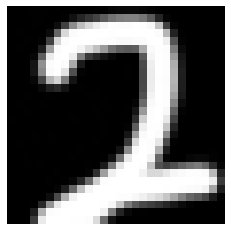

In [151]:
#Testing the algorithm:
image = Image.open('2.jpg')
data = asarray(image)
x=data[:,:,0].reshape(784)
neigh=get_neighbors(train_data,train_labels,x,5)
#near=np.array(neigh) #To control the shape
predicted_label=most_frequent(near[:,2])
print("True value= 2")
print("Predicted Value= ",predicted_label)
from matplotlib import image
img = image.imread('2.jpg')
plt.axis('off')
plt.imshow(img)
plt.show()

# Classification Using Sklearn library

True value= 2
Predicted Value=  2


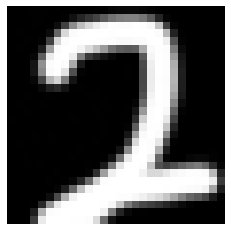

In [154]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors = 3).fit(train_data,train_labels)
image = Image.open('2.jpg')
data = asarray(image)
x=data[:,:,0].reshape(784)
x=[x]
print("True value= 2")
print("Predicted Value= ",neigh.predict(x)[0])
from matplotlib import image
img = image.imread('2.jpg')
plt.axis('off')
plt.imshow(img)
plt.show()

At k=  1
True value= 2
Predicted Value=  3


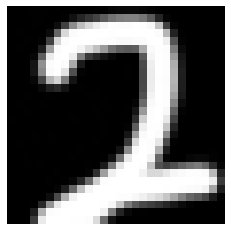

At k=  2
True value= 2
Predicted Value=  2


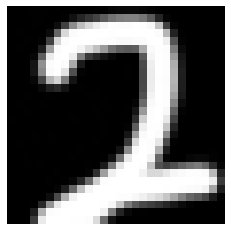

At k=  3
True value= 2
Predicted Value=  2


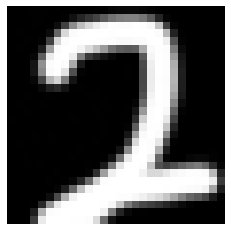

At k=  4
True value= 2
Predicted Value=  2


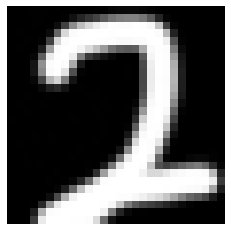

At k=  5
True value= 2
Predicted Value=  2


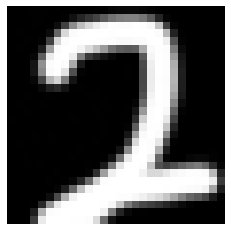

At k=  6
True value= 2
Predicted Value=  2


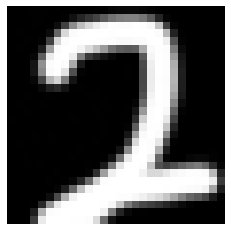

At k=  7
True value= 2
Predicted Value=  2


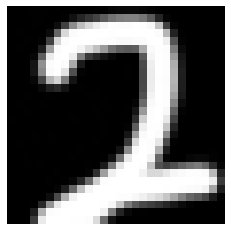

At k=  8
True value= 2
Predicted Value=  7


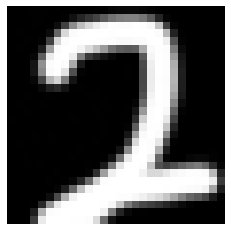

At k=  9
True value= 2
Predicted Value=  7


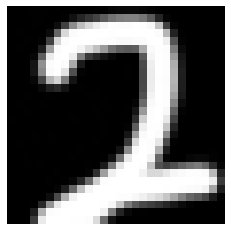

At k=  10
True value= 2
Predicted Value=  7


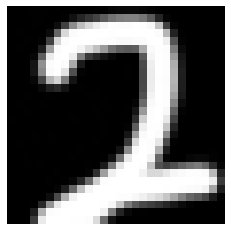

At k=  11
True value= 2
Predicted Value=  7


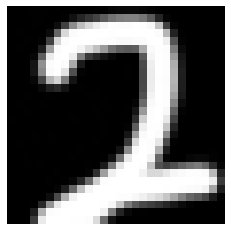

In [155]:
#Trying different k and check for the output ?
for i in range (1,12):
    print("At k= ",i)
    neigh=KNeighborsClassifier(n_neighbors = i).fit(train_data,train_labels)
    image = Image.open('2.jpg')
    data = asarray(image)
    x=data[:,:,0].reshape(784)
    x=[x]
    print("True value= 2")
    print("Predicted Value= ",neigh.predict(x)[0])
    from matplotlib import image
    img = image.imread('2.jpg')
    plt.axis('off')
    plt.imshow(img)
    plt.show()

<h1>Conculusion</h1>
<p>
    The accuracy depends on the value of k, but without a certain relationship
</p>